# Soil Water Deficits

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [74]:
# Load data
df = pd.read_csv("../datasets/wheat_ftsw.csv")
df.head()


,climate_class,city,state,year,BD-14,BD-18,BD-22,BD-26,BD-31,BD-35,BD-39,BD-43,BD-47,BD-51,BD-55,BD-60,BD-64,BD-68,BD-72,yield
0,semi-arid,Akron,CO,1986,0.642,0.707,0.468,0.279,0.285,0.134,0.249,0.225,0.082,0.039,0.031,0.024,0.033,0.068,0.042,2952
1,semi-arid,Byers,CO,1989,0.461,0.486,0.500,0.330,0.130,0.062,0.025,0.092,0.039,0.044,0.031,0.010,0.003,0.007,0.002,1715
2,semi-arid,Lamar,CO,1992,0.796,0.675,0.582,0.395,0.278,0.163,0.155,0.159,0.111,0.157,0.080,0.028,0.034,0.086,0.096,3437
3,semi-arid,Sedgwick,CO,1996,0.775,0.821,0.761,0.523,0.289,0.136,0.059,0.088,0.157,0.201,0.150,0.206,0.126,0.108,0.117,4091
4,semi-arid,Colby,KS,1999,0.714,0.611,0.660,0.397,0.214,0.177,0.099,0.054,0.031,0.012,0.008,0.004,0.003,0.002,0.001,1619


In [76]:
X = df.iloc[:,4:-1].values
X.shape


(75, 15)

In [77]:
k = 3
groups = KMeans(n_clusters=k, random_state=0).fit_predict(X)
print(groups)


[0 0 0 0 0 0 2 0 0 2 0 1 2 0 2 0 2 0 0 2 0 2 0 0 2 2 1 0 2 2 0 2 2 1 2 1 2
 2 1 2 1 2 0 1 2 1 0 2 2 2 1 2 1 0 2 2 1 1 1 1 1 2 1 1 1 2 2 2 2 1 2 1 1 1
 1]


In [80]:
# Get cumulative biological days for plotting purposes
cbd = [np.float(col[3:]) for col in df.columns[4:-1]]
print(cbd)


[14.0, 18.0, 22.0, 26.0, 31.0, 35.0, 39.0, 43.0, 47.0, 51.0, 55.0, 60.0, 64.0, 68.0, 72.0]


In [81]:
# Add groups to DataFrame
df.insert(1,"Kgroup",groups)


In [97]:
# Examine matching of Kgroups with known climate classification according to Aridity Index
for i in range(df.shape[0]):
    print(df.loc[i,"city"],': ', df.loc[i,"climate_class"], df.loc[i,"Kgroup"])
    

Akron :  semi-arid 0
Byers :  semi-arid 0
Lamar :  semi-arid 0
Sedgwick :  semi-arid 0
Colby :  semi-arid 0
Dodge City :  semi-arid 0
Elkhart :  semi-arid 2
Garden City :  semi-arid 0
Goodland :  semi-arid 0
Liberal :  semi-arid 2
Ness City :  semi-arid 0
Oakley :  semi-arid 1
St. John :  semi-arid 2
Tribune :  semi-arid 0
Beaver :  semi-arid 2
Boise City :  semi-arid 0
Crosbyton :  semi-arid 2
Dalhart :  semi-arid 0
Dumas :  semi-arid 0
Haskell :  semi-arid 2
Hereford :  semi-arid 0
Muleshoe :  semi-arid 2
Perryton :  semi-arid 0
Plainview :  semi-arid 0
Quanah :  semi-arid 2
Ellsworth :  dry-subhumid 2
Ellsworth :  dry-subhumid 1
Great Bend :  dry-subhumid 0
Greensburg :  dry-subhumid 2
Kiowa :  dry-subhumid 2
Meade :  dry-subhumid 0
Medicine Lodge :  dry-subhumid 2
Norton :  dry-subhumid 2
Pratt :  dry-subhumid 1
Salina :  dry-subhumid 2
Scandia :  dry-subhumid 1
Smith Center :  dry-subhumid 2
Altus :  dry-subhumid 2
Alva :  dry-subhumid 1
Bessie :  dry-subhumid 2
Elk City :  dry-su

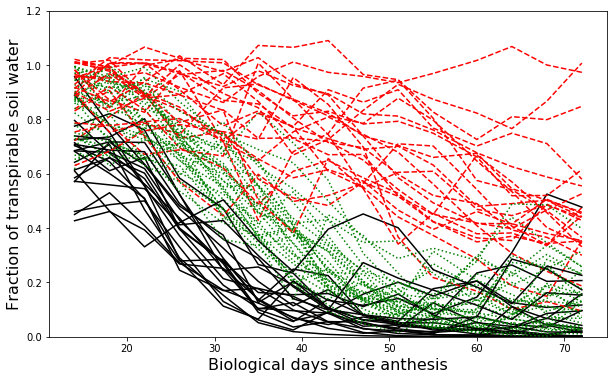

In [96]:
plt.figure(figsize=(10,6))

for i,g in enumerate(groups):
    if g == 0: 
        plt.plot(cbd, df.iloc[i,5:-1], '-k')
    elif g == 1: 
        plt.plot(cbd, df.iloc[i,5:-1], '--r')
    elif g == 2: 
        plt.plot(cbd, df.iloc[i,5:-1], ':g')
        
plt.xlabel('Biological days since anthesis', size=16)
plt.ylabel('Fraction of transpirable soil water', size=16)
plt.ylim(0,1.2)
plt.show()

## References

Sciarresi, C., Patrignani, A., Soltani, A., Sinclair, T. and Lollato, R.P., 2019. Plant traits to increase winter wheat yield in semiarid and subhumid environments. Agronomy Journal, 111(4), pp.1728-1740.